### Estudo a cerca do grafo do artigo selecionado

Para trabalharmos com as manipulaçoes do arrays , precisamos importar o modulo numpy e pandas, que são bibliotecas de matematica e estatística para python. 

In [1]:
import pandas as pd 
import numpy as np

Construindo a matriz de adjacencia a partir do grafo

In [2]:
# Número de vértices no grafo (nós de 1 a 15)
num_vertices = 15

# Inicializando a matriz de adjacência com zeros (sem arestas inicialmente)
adj_matrix = np.zeros((num_vertices, num_vertices))

# Definindo as arestas conforme a imagem (baseado nos pesos fornecidos)
vertices = [
    (1,  2,  170), 
    (1,  3,  16), 
    (1,  4,  25),
    (2,  3,  50),
    (3,  4,  40), 
    (3,  6,  60),
    (4,  5,  40),
    (5,  6,  60), 
    (5,  11, 20),
    (6,  7,  60), 
    (6,  10, 80),
    (7,  8,  80),
    (8,  9,  70),
    (9,  10, 80), 
    (9,  13, 70),
    (10, 12, 120),
    (11, 12, 30),
    (12, 14, 120),
    (13, 15, 70), 
    (14, 15, 70)
]

# Preenchendo a matriz com os pesos das arestas
for vertice in vertices:
    u, v, peso = vertice
    adj_matrix[u-1, v-1] = peso  # Subtraímos 1 pois os índices de matriz começam em 0
    adj_matrix[v-1, u-1] = peso  # A matriz é simétrica para um grafo não direcionado

Transformando em pd.Dataframe e salvando a matriz de adjacencia em .csv

In [3]:
df = pd.DataFrame(adj_matrix)
df.to_csv('artigo_de_estudo/matriz_adjacente.csv')

display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,170.0,16.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,170.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,50.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0.0,40.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
5,0.0,0.0,60.0,0.0,60.0,0.0,60.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,60.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,80.0,0.0,0.0,70.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,80.0,0.0,0.0,120.0,0.0,0.0,0.0


A partir daqui definiremos como biblioteca a ser utilizada o `networkx` 

In [4]:
import networkx as nx

O tipo de dados que iremos trabalhar no NetworkX é o `DiGraph`, pois esse tipo de dado permite grafos direcionados, bem como loops de um mesmo vértice. Além disso 

In [5]:
G = nx.DiGraph(df)

Para realizar a plotagem do grafo direcionado iremos usar o metodo `draw()` e o modulo `matplotlib`

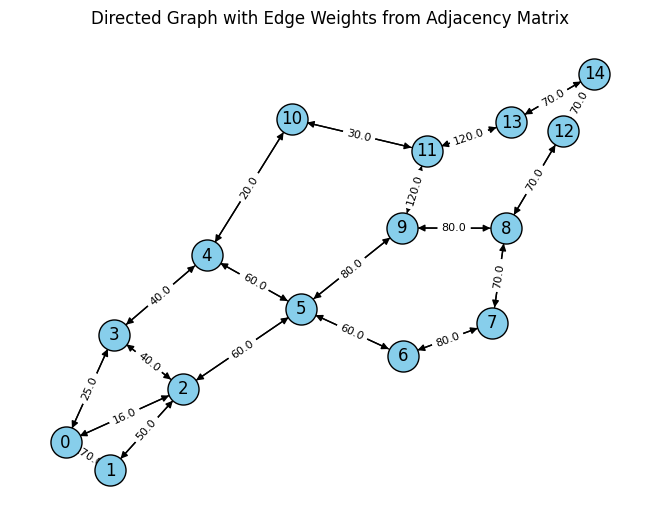

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)

# Step 4: Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edgecolors='black', arrows=True)

# Step 5: Draw the edge labels with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Show the plot
plt.title("Directed Graph with Edge Weights from Adjacency Matrix")
plt.show()

Por fim, vamos aplicar o método de Floyd-Warshall para encontrar os menores caminhos possiveis entre cada vertice

IMPLEMENTAÇÃO UTILIZANDO A BIBLIOTECA `networkx`

In [7]:
floy_warshall = nx.floyd_warshall(G)
results = {a: dict(b) for a, b in floy_warshall.items()}

IMPLEMENTAÇÃO SEGUINDO O PSEUDOCÓDIGO:

pseudocódigo:

```plaintext
função floyd_warshall(grafo):
    # Número de vértices no grafo
    n = comprimento(grafo)

    # Inicializa a matriz de distâncias
    dist = matriz(n, n, ∞)  # Cria uma matriz n x n preenchida com ∞

    # Define a distância de cada vértice para si mesmo como 0
    para cada vértice i de 0 a n-1:
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    para cada vértice i de 0 a n-1:
        para cada vértice j de 0 a n-1:
            se grafo[i][j] ≠ 0:
                dist[i][j] = grafo[i][j]

    # Algoritmo de Floyd-Warshall
    para cada vértice k de 0 a n-1:
        para cada vértice i de 0 a n-1:
            para cada vértice j de 0 a n-1:
                # Atualiza a distância mínima
                dist[i][j] = mínimo(dist[i][j], dist[i][k] + dist[k][j])

    retornar dist


In [8]:
def floyd_warshall(graph):
    # Número de vértices no grafo
    n = len(graph)
    
    # Inicializa a matriz de distâncias
    dist = [[float('inf')] * n for _ in range(n)]
    
    # Define a distância de cada vértice para si mesmo como 0
    for i in range(n):
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    for i in range(n):
        for j in range(n):
            if graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    # Algoritmo de Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Atualiza a distância mínima
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

graph = df.values
results = floyd_warshall(graph)

exibe os resultados do metodo de menor distancia

In [9]:
def print_menor_caminho(results, vertice_origem=None, vertice_destino=None):
    try: 
        if vertice_origem is None and  vertice_destino is None:
            vertice_origem = int(input('Digite o vértice de origem: '))
            vertice_destino = int(input('Digite o vértice de destino: '))
        print(f'O menor caminho do vertice {vertice_origem} para o vertice {vertice_destino} é de custo = {results[vertice_origem][vertice_destino]}')
    except:
        print('Não foi possível printar o menor caminho entre dois vertices, pois nao foram definidos os vertices')

print_menor_caminho(results, 0, 1)

O menor caminho do vertice 0 para o vertice 1 é de custo = 66.0
